# <SPAN style=color:darkblue>EXERCICI 2</SPAN>
# <SPAN style=color:darkblue>PRE-PROCESADO Y ADECUACIÓN DEL DATASET MOVIES.DAT</SPAN>

In [420]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Abrimos el fichero

In [421]:
df=pd.read_csv('movies.dat', sep='::', encoding='latin-1',  names=['Index','Movie','Movie_genre'])
df.head()

,Index,Movie,Movie_genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        3883 non-null   int64 
 1   Movie        3883 non-null   object
 2   Movie_genre  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


El dataset tiene 3883 filas y 3 columnas

Eliminamos del dataframe los carácteres que nos pueden suponer un problema a la hora de manejar la información

In [430]:
df.replace('[\"\',]','', regex=True, inplace=True) 
df.head()

,Index,Movie,Movie_genre
0,1,Toy Story (1995),Animation|Childrens|Comedy
1,2,Jumanji (1995),Adventure|Childrens|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## <span style=color:darkgreen>CREAMOS LA COLUMNA 'YEAR'</span>

In [431]:
df_1 = pd.DataFrame(df['Movie'].str[-5:-1]).rename(
    columns={'Movie':'Year'})
df_1.head()

,Year
0,1995
1,1995
2,1995
3,1995
4,1995


## <span style=color:darkgreen>CREAMOS LA COLUMNA 'MOVIE GENRE'</span>

In [432]:
df_2=pd.DataFrame(df['Movie'].str[:-6])
df_2.head()

,Movie
0,Toy Story
1,Jumanji
2,Grumpier Old Men
3,Waiting to Exhale
4,Father of the Bride Part II


## <span style=color:darkgreen>CREAMOS LAS COLUMNAS 'GENRE'</span>

In [433]:
df['Movie_genre'].nunique()

301

Detectamos que el género de la pélicula es en realidad una composición de varios géneros, ya que una película puede pertenecer a varios géneros a la vez. La asignación del género se realiza por orden alfabético, es decir, no hay un criterio que de los géneros imputados permita determinar uno más representativo que el otro.

Debemos quedarnos con un único género por película.

In [435]:
df_3=df['Movie_genre'].str.split('|', expand=True)
df_3.head()

,0,1,2,3,4,5
0,Animation,Childrens,Comedy,None,None,None
1,Adventure,Childrens,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [436]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   object
 1   1       1858 non-null   object
 2   2       536 non-null    object
 3   3       115 non-null    object
 4   4       15 non-null     object
 5   5       1 non-null      object
dtypes: object(6)
memory usage: 182.1+ KB


Constatamos que 1858 de las 3883 películas tienen más de un género asignado.

In [437]:
df_3.columns=['A','B','C','D','E','F']
df_3.head()

,A,B,C,D,E,F
0,Animation,Childrens,Comedy,None,None,None
1,Adventure,Childrens,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [438]:
columnas=['A','B','C','D','E','F']

In [439]:
df_3['A'].value_counts().sort_index()

Action          503
Adventure       155
Animation        90
Childrens        89
Comedy         1024
Crime           131
Documentary     123
Drama          1176
Fantasy           2
Film-Noir        25
Horror          262
Musical          25
Mystery          36
Romance          50
Sci-Fi           46
Thriller        101
War              12
Western          33
Name: A, dtype: int64

In [440]:
df_3['B'].value_counts().sort_index()

Adventure      128
Animation       12
Childrens      147
Comedy         129
Crime           63
Documentary      4
Drama          381
Fantasy         20
Film-Noir       14
Horror          71
Musical         47
Mystery         51
Romance        327
Sci-Fi         140
Thriller       228
War             78
Western         18
Name: B, dtype: int64

In [441]:
df_3[(df_3['A']=='Fantasy')&(df_3['B'].isnull())]

,A,B,C,D,E,F
782,Fantasy,None,None,None,None,None


Decidimos crear una columna que recoja el último género asignado por orden alfabético.

In [442]:
df_3['G']=df_3['F']

In [443]:
df_3.loc[df_3['G'].isnull()==True,'G']=df_3['E']

In [444]:
df_3.loc[df_3['G'].isnull()==True,'G']=df_3['D']

In [445]:
df_3.loc[df_3['G'].isnull()==True,'G']=df_3['C']

In [446]:
df_3.loc[df_3['G'].isnull()==True,'G']=df_3['B']

In [447]:
df_3.loc[df_3['G'].isnull()==True,'G']=df_3['A']

In [448]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       3883 non-null   object
 1   B       1858 non-null   object
 2   C       536 non-null    object
 3   D       115 non-null    object
 4   E       15 non-null     object
 5   F       1 non-null      object
 6   G       3883 non-null   object
dtypes: object(7)
memory usage: 212.5+ KB


In [450]:
df_3.head()

,A,B,C,D,E,F,G
0,Animation,Childrens,Comedy,None,None,None,Comedy
1,Adventure,Childrens,Fantasy,None,None,None,Fantasy
2,Comedy,Romance,None,None,None,None,Romance
3,Comedy,Drama,None,None,None,None,Drama
4,Comedy,None,None,None,None,None,Comedy


In [451]:
df_3['G'].value_counts()

Drama          1151
Comedy          625
Thriller        483
Romance         410
Horror          235
Sci-Fi          197
War             142
Documentary     120
Musical          92
Childrens        76
Western          68
Action           65
Crime            60
Mystery          49
Fantasy          46
Adventure        42
Film-Noir        19
Animation         3
Name: G, dtype: int64

In [454]:
df_4=df_3.reindex(
    columns=['G']).rename(
    columns={'G':'Movie_genre'})
df_4

,Movie_genre
0,Comedy
1,Fantasy
2,Romance
3,Drama
4,Comedy
...,...
3878,Comedy
3879,Drama
3880,Drama
3881,Drama


## <span style=color:darkgreen>CREAMOS EL NUEVO DATAFRAME MOVIES</span>

In [458]:
df_5=pd.merge(df_1,df_2,left_index=True, right_index=True)
df_5.head()

,Year,Movie
0,1995,Toy Story
1,1995,Jumanji
2,1995,Grumpier Old Men
3,1995,Waiting to Exhale
4,1995,Father of the Bride Part II


In [459]:
movies=pd.merge(df_5,df_4,left_index=True, right_index=True)
movies.head()

,Year,Movie,Movie_genre
0,1995,Toy Story,Comedy
1,1995,Jumanji,Fantasy
2,1995,Grumpier Old Men,Romance
3,1995,Waiting to Exhale,Drama
4,1995,Father of the Bride Part II,Comedy


In [460]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         3883 non-null   object
 1   Movie        3883 non-null   object
 2   Movie_genre  3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


Convertimos la variable Year a numérica

In [489]:
movies['Year']=movies['Year'].astype('int')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         3883 non-null   int64 
 1   Movie        3883 non-null   object
 2   Movie_genre  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [491]:
movies['Movie'].value_counts()

Hamlet                                        5
Mummy The                                     3
Ballad of Narayama The (Narayama Bushiko)     2
Dracula                                       2
101 Dalmatians                                2
                                             ..
Breathing Room                                1
Paris Was a Woman                             1
Anna                                          1
Im Not Rappaport                              1
Contender The                                 1
Name: Movie, Length: 3841, dtype: int64

In [492]:
movies[movies['Movie']=='Hamlet ']

,Year,Movie,Movie_genre
1388,1996,Hamlet,Drama
1872,1948,Hamlet,Drama
2751,1964,Hamlet,Drama
3529,2000,Hamlet,Drama
3654,1990,Hamlet,Drama


Vemos que pueden haber varias películas con el mismo título, pero se corresponden a años diferentes así que no se tratan de valores duplicados.

# <SPAN style=color:darkblue>EXERCICI 3</SPAN>
# <SPAN style=color:darkblue>ANALISIS ESTADISTICO Y GRÁFICO DEL DATASET MOVIES.DAT</SPAN>

In [463]:
movies.describe(include='all')

,Year,Movie,Movie_genre
count,3883.000000,3883,3883
unique,NaN,3841,18
top,NaN,Hamlet,Drama
freq,NaN,5,1151
mean,1986.066959,NaN,NaN
std,16.895690,NaN,NaN
min,1919.000000,NaN,NaN
25%,1982.000000,NaN,NaN
50%,1994.000000,NaN,NaN
75%,1997.000000,NaN,NaN


## <span style=color:darkgreen>DESCRIPCION DEL DATASET</span>


Se trata de una base de datos que clasifica una serie de películas por género hasta el año 2000 incluido.  
Por el tamaño de la muestra, podemos intuir que se trata de una clasificación por género de unas peliculas premiadas, o candidatas a un premio por cada año, o más taquilleras...pero no disponemos de esta información.

#### Variables
-Any : El año hasta el 2000   
-Movie : El título de la película en inglés    
-Movie_Genre : El género de la película (18) 

#### Datos relevantes
-Aunque disponemos de información desde principios del siglo XX, es relevante constatar que el 50% de los datos se concentran en los últimos 6 años antes del 2000, desde el 1994 (la mediana).  
-La desviación standard es de 17 años, es decir, los datos están muy concentrados alrededor de la media.

## <span style=color:darkgreen>PELICULAS POR AÑO</span>

<function matplotlib.pyplot.show(close=None, block=None)>

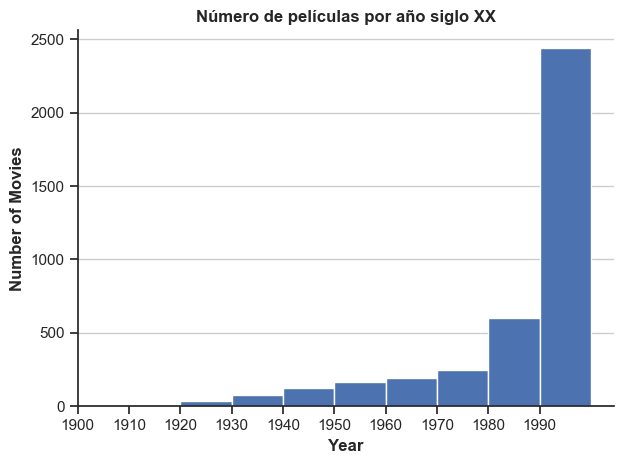

In [523]:
plt.rcParams['figure.autolayout']=True
customs_params={'axes.spines.right':False,'axes.spines.top':False,}
sns.set_theme(style='ticks',rc=customs_params)

plt.hist(movies['Year'],bins=[ 1910,1920,1930,1940,1950,1960,1970,1980,1990,2000])
  
plt.xticks(np.arange(1900,2000,10))
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Number of Movies',fontweight='bold')
plt.title('Número de películas por año siglo XX',fontweight='bold')
plt.grid(axis='y')
plt.show

Se trata de una distribución asimétrica con una gran concentración de datos en la parte derecha de la gráfica, a finales del siglo XX.

La tendencia es de crecimiento exponencial desde principios de siglo. 

<function matplotlib.pyplot.show(close=None, block=None)>

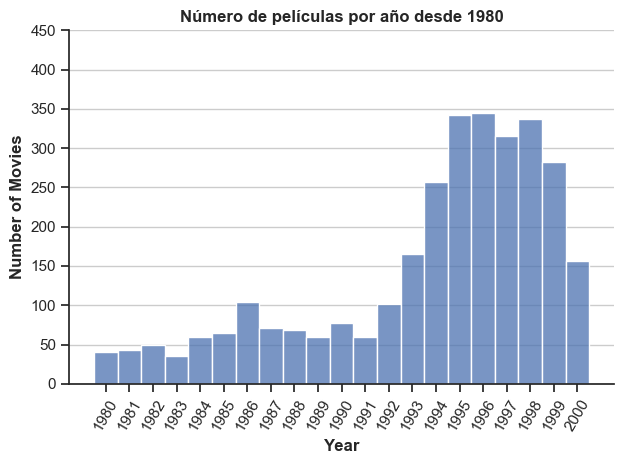

In [565]:
#plt.rcParams['figure.autolayout']=True
customs_params={'axes.spines.right':False,'axes.spines.top':False,}
sns.set_theme(style='ticks',rc=customs_params)


sns.histplot(data=movies[movies.Year>1979],x='Year', bins=21,discrete=True)

plt.xticks(np.arange(1980,2001))
plt.xlabel('Year',fontweight='bold')
plt.xticks(rotation=60)
plt.yticks(np.arange(0,500,50))
plt.ylabel('Number of Movies',fontweight='bold')
plt.title('Número de películas por año desde 1980',fontweight='bold')
plt.grid(axis='y')
plt.show

Este análisis más detallado de los últimos 20 años poner de relieve que el año con más películas de la historia fue el año 1996 con 345 películas (la moda de la muestra), a partir de entonces se nota una reducción progresiva del número de películas.

## <span style=color:darkgreen>PELICULAS POR GENERO</span>

<function matplotlib.pyplot.show(close=None, block=None)>

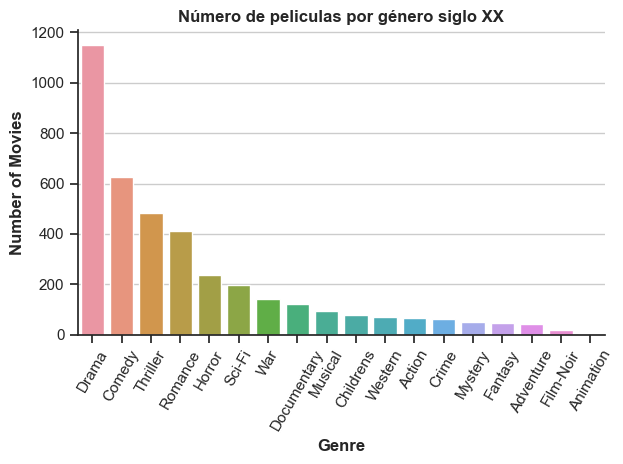

In [590]:
plt.rcParams['figure.autolayout']=True
customs_params={'axes.spines.right':False,'axes.spines.top':False,}
sns.set_theme(style='ticks',rc=customs_params)


sns.countplot(data=movies,x='Movie_genre',order = movies['Movie_genre'].value_counts().index)


plt.xlabel('Genre',fontweight='bold')
plt.xticks(rotation=60)
plt.ylabel('Number of Movies',fontweight='bold')
plt.title('Número de peliculas por género siglo XX',fontweight='bold')
plt.grid(axis='y')
plt.show

Esta gráfica pone de relieve que existe una gran concentración de peliculas en los 4 primeros géneros (Drama, Comedy, Thriller y Romance), que representan cerca del 70% del total de películas

In [579]:
movies['Movie_genre'].value_counts()

Drama          1151
Comedy          625
Thriller        483
Romance         410
Horror          235
Sci-Fi          197
War             142
Documentary     120
Musical          92
Childrens        76
Western          68
Action           65
Crime            60
Mystery          49
Fantasy          46
Adventure        42
Film-Noir        19
Animation         3
Name: Movie_genre, dtype: int64

## <span style=color:darkgreen>PELICULAS POR GENERO Y AÑO</span>

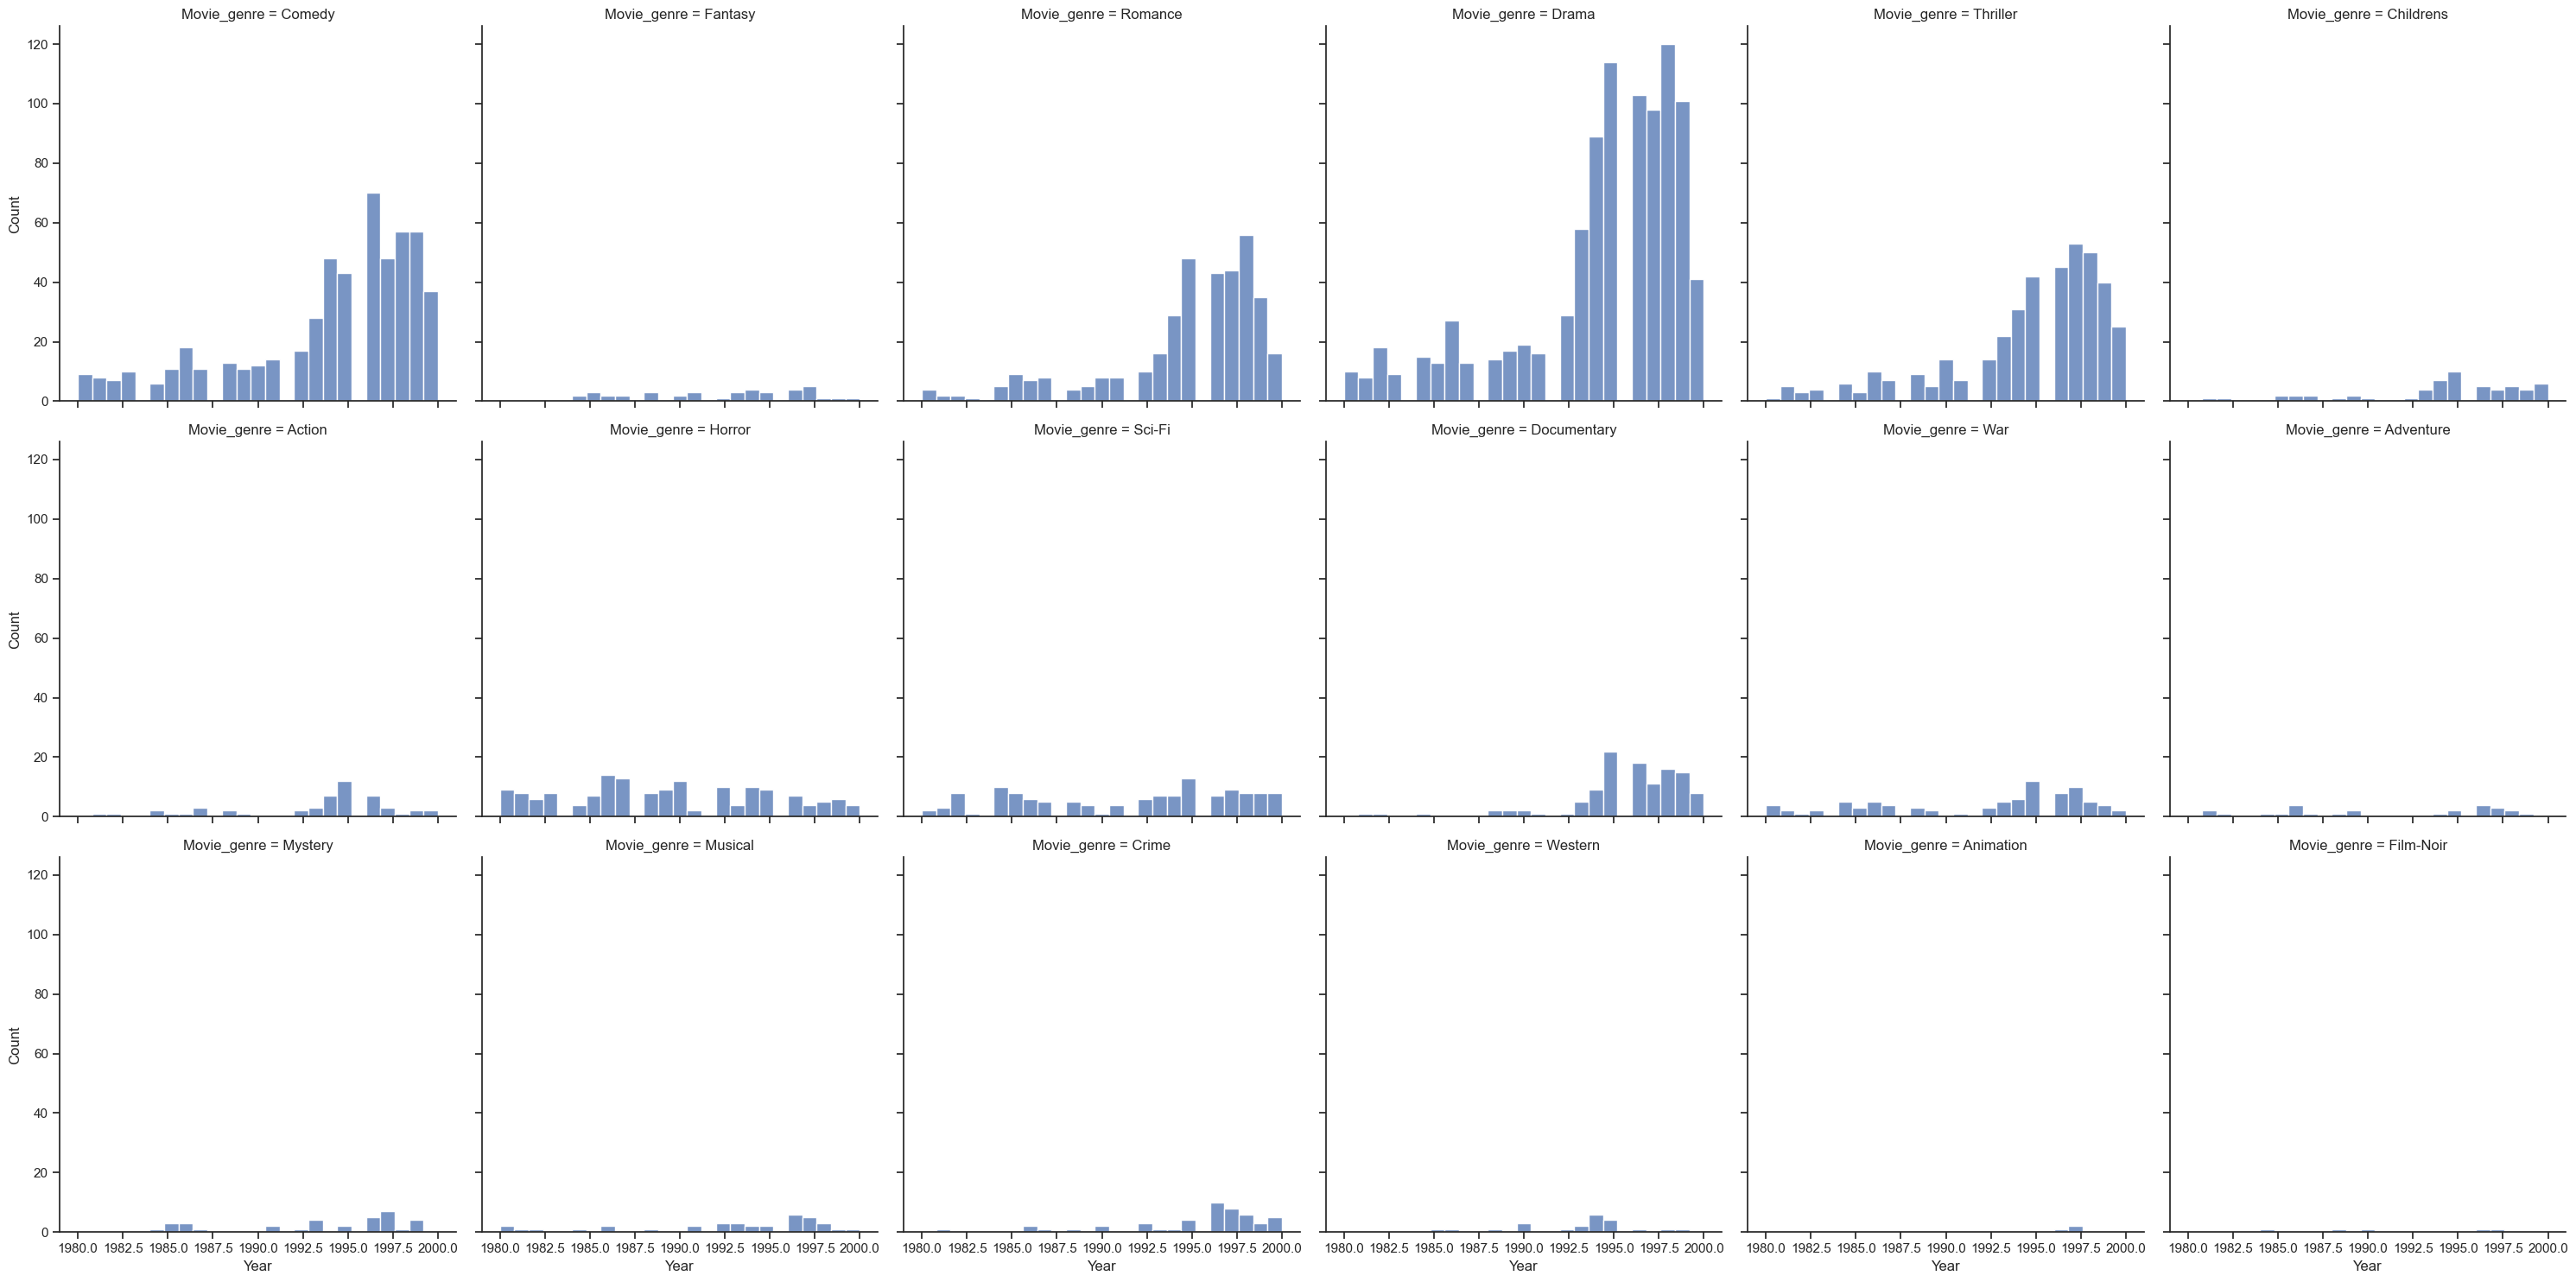

In [594]:
sns.displot(data=movies[movies.Year>1979], x="Year",col='Movie_genre',col_wrap=6)

A través de estas gráficas, podemos observar que la evolución a la baja desde el 1996 no se debe a una categoría en particular, sino que todas siguen la misma tendencia.